# **Get Data and Preprocess**

In [34]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\simyu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
def preprocess(text):
    text = re.sub('[^A-Za-z0-9 ]+', '', text)
    text = text.lower()
    words = text.split()
    words = [w for w in words if not w in set(stopwords.words("english"))]
    words = [WordNetLemmatizer().lemmatize(word) for word in words]
    return " ".join(words)

In [36]:
def get_data(file):
    data = pd.read_json(file)
    #x_data = data['text'].apply(preprocess)
    x_data = data['text']
    y_data = data['label']
    return x_data, y_data

In [37]:
import pandas as pd
import numpy as np

In [38]:
x_train, y_train = get_data('train.json')
x_test, y_test = get_data('test.json')

In [39]:
# x_train.to_csv('data/x_train.csv')
# x_test.to_csv('data/x_test.csv')
# x_train = pd.read_csv('x_train.csv', index_col=False, header=0)['text']
# x_test = pd.read_csv('x_test.csv', index_col=False, header=0)['text']
x_train

0        Bromwell High is a cartoon comedy. It ran at t...
1        Homelessness (or Houselessness as George Carli...
2        Brilliant over-acting by Lesley Ann Warren. Be...
3        This is easily the most underrated film inn th...
4        This is not the typical Mel Brooks film. It wa...
                               ...                        
24995    Towards the end of the movie, I felt it was to...
24996    This is the kind of movie that my enemies cont...
24997    I saw 'Descent' last night at the Stockholm Fi...
24998    Some films that you pick up for a pound turn o...
24999    This is one of the dumbest films, I've ever se...
Name: text, Length: 25000, dtype: object

In [40]:
# y_train.to_csv('data/y_train.csv')
# y_test.to_csv('data/y_test.csv')
y_train = pd.read_csv('y_train.csv', index_col=False, header=0)['label']
y_test = pd.read_csv('y_test.csv', index_col=False, header=0)['label']
y_train.unique()

array(['+', '-'], dtype=object)

In [41]:
mapping = {'+': 1, '-': -1}
train_sentiment = y_train.replace(mapping)
test_sentiment = y_test.replace(mapping)
train_sentiment

0        1
1        1
2        1
3        1
4        1
        ..
24995   -1
24996   -1
24997   -1
24998   -1
24999   -1
Name: label, Length: 25000, dtype: int64

# **Get Vocabulary**

In [42]:
nltk.download('punkt')   
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
def get_sentences( review, tokenizer):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            #words = preprocess(raw_sentence, string=False)
            words = raw_sentence
            sentences.append(words)
    return sentences

In [44]:
data = pd.read_json('train.json')
raw_x_train = data['text']
raw_y_train = data['label']
data = pd.read_json('test.json')
raw_x_test = data['text']
raw_y_test = data['label']

In [45]:
sentences = []
for review in raw_x_train:
    sentences += get_sentences(review, tokenizer)
sentences[0]

'Bromwell High is a cartoon comedy.'

In [46]:
# df = pd.DataFrame(np.array(sentences))
# df.reset_index().to_json('/content/drive/MyDrive/sentences.json')
# data_sentences = pd.read_json('sentences.json')
# sentences = data_sentences['0']
sentences

['Bromwell High is a cartoon comedy.',
 'It ran at the same time as some other programs about school life, such as "Teachers".',
 'My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers".',
 "The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students.",
 'When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High.',
 "A classic line: INSPECTOR: I'm here to sack one of your teachers.",
 'STUDENT: Welcome to Bromwell High.',
 'I expect that many adults of my age think that Bromwell High is far fetched.',
 "What a pity that it isn't!",
 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered

In [47]:
idx = [ii for ii, sentence in enumerate(sentences) if (len(sentence) > 0)]
sentences = [sentences[ii] for ii in idx]

In [48]:
all_words = []
for sentence in sentences:
    all_words.extend(sentence)
len(all_words)

vocab = set()
for sentence in sentences:
    vocab.update(sentence)
len(vocab)

178

# **Remove Outliers**

In [49]:
from collections import Counter
import matplotlib.pyplot as plt

counts = Counter(all_words)
train_review_lens = Counter([len(x.split()) for x in x_train])
test_review_lens = Counter([len(x.split()) for x in x_test])

Text(0, 0.5, 'Number of reviews')

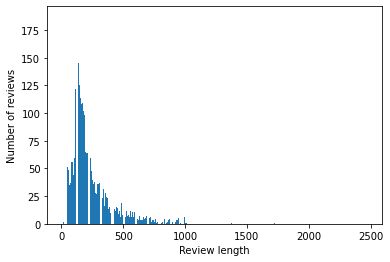

In [50]:
plt.bar(train_review_lens.keys(), train_review_lens.values())
plt.xlabel('Review length')
plt.ylabel('Number of reviews')

Text(0, 0.5, 'Number of reviews')

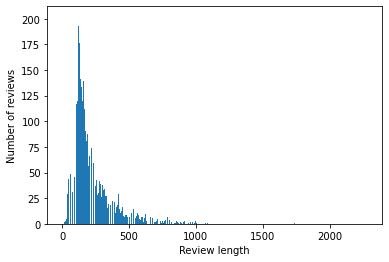

In [51]:
plt.bar(test_review_lens.keys(), test_review_lens.values())
plt.xlabel('Review length')
plt.ylabel('Number of reviews')

In [52]:
print('Number of training reviews before removing outliers: ', len(x_train))
idx = [ii for ii, review in enumerate(x_train) if (len(review.split()) > 0 and len(review.split()) < 200)]
x_train = [x_train[ii] for ii in idx]
train_sentiment = np.array([train_sentiment[ii] for ii in idx])
print('Number of training reviews after removing outliers: ', len(x_train))

Number of training reviews before removing outliers:  25000
Number of training reviews after removing outliers:  14580


In [53]:
print('Number of testing reviews before removing outliers: ', len(x_test))
idx = [ii for ii, review in enumerate(x_test) if (len(review.split()) > 0 and len(review.split()) < 200)]
x_test = [x_test[ii] for ii in idx]
test_sentiment = np.array([test_sentiment[ii] for ii in idx])
print('Number of testing reviews after removing outliers: ', len(x_test))

Number of testing reviews before removing outliers:  25000
Number of testing reviews after removing outliers:  14835


# **Feature Engineering with BoW and Tf-idf**

In [54]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [55]:
def get_bow(clean_train_text, clean_test_text):
    vectorizer = CountVectorizer(analyzer = "word", max_features = 10000) 
    train_bow = vectorizer.fit_transform(clean_train_text).toarray()
    test_bow = vectorizer.transform(clean_test_text).toarray()
    return train_bow, test_bow

In [56]:
def get_tfidf(clean_train_text, clean_test_text):
    vectorizer = TfidfVectorizer(analyzer = "word", max_features = 10000) 
    train_tfidf = vectorizer.fit_transform(clean_train_text).toarray()
    test_tfidf = vectorizer.transform(clean_test_text).toarray()
    return train_tfidf, test_tfidf

In [57]:
train_bow, test_bow = get_bow(x_train, x_test)
train_tfidf, test_tfidf = get_tfidf(x_train, x_test)
train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Feature Engineering with Word2Vec (Average Vectors)**

Referenced from https://github.com/wendykan/DeepLearningMovies

In [ ]:
from gensim.models import Word2Vec

In [ ]:
num_features = 300    
min_word_count = 40   
num_workers = 4       
context = 10          
downsampling = 1e-3   

word2vec_model = Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, seed=1)

word2vec_model.init_sims(replace=True)

In [ ]:
def makeFeatureVec(words, model, num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0
    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [ ]:
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [ ]:
clean_train_reviews = [review.split() for review in x_train]
clean_test_reviews = [review.split() for review in x_test]

In [ ]:
train_vectors = getAvgFeatureVecs(clean_train_reviews, word2vec_model, num_features)
test_vectors = getAvgFeatureVecs(clean_test_reviews, word2vec_model, num_features)

In [ ]:
model_name = "/content/drive/MyDrive/300features_40minwords_10context"
word2vec_model.save(model_name)

In [ ]:
word2vec_model = Word2Vec.load("/content/drive/MyDrive/300features_40minwords_10context")
word_vectors = word2vec_model.wv.syn0

# **Feature Engineering with Word2Vec (Bag of Centroids)**

Referenced from https://github.com/wendykan/DeepLearningMovies

In [ ]:
from sklearn.cluster import KMeans

num_clusters = int(word_vectors.shape[0] / 5)
kmeans_clustering = KMeans(n_clusters = num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)
word_centroid_map = dict(zip(word2vec_model.wv.index2word, idx))

In [ ]:
def create_bag_of_centroids( wordlist, word_centroid_map ):
    num_centroids = max( word_centroid_map.values() ) + 1
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    return bag_of_centroids

In [ ]:
train_centroids = np.zeros((len(x_train), num_clusters), \
    dtype="float32" )
test_centroids = np.zeros((len(x_test), num_clusters), \
    dtype="float32" )

In [ ]:
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1
counter = 0
for review in clean_test_reviews:
    test_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

# **Pre-Trained Word2Vec**

Referenced from https://github.com/cezannec/CNN_Text_Classification

In [ ]:
from gensim.models import KeyedVectors

embed_lookup = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300-SLIM.bin', 
                                                 binary=True)
pretrained_words = []
for word in embed_lookup.vocab:
    pretrained_words.append(word)

In [ ]:
def tokenize_all_reviews(embed_lookup, reviews):
    reviews_words = [review.split() for review in reviews]
    tokenized_reviews = []
    for review in reviews_words:
        ints = []
        for word in review:
            try:
                idx = embed_lookup.vocab[word].index
            except: 
                idx = 0
            ints.append(idx)
        tokenized_reviews.append(ints)
    
    return tokenized_reviews

In [ ]:
tokenized_reviews_train = tokenize_all_reviews(embed_lookup, x_train)
tokenized_reviews_test = tokenize_all_reviews(embed_lookup, x_test)

In [ ]:
def pad_features(tokenized_reviews, seq_length):
    features = np.zeros((len(tokenized_reviews), seq_length), dtype=int)
    for i, row in enumerate(tokenized_reviews):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [ ]:
seq_length = 200
train_google_features = pad_features(tokenized_reviews_train, seq_length=seq_length)
test_google_features = pad_features(tokenized_reviews_test, seq_length=seq_length)

# **Get Metrics and Plots**

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score, f1_score
import time

In [59]:
def get_metrics(y_test, preds):
    accuracy = accuracy_score(y_test, preds)
    print('Accuracy:', accuracy)
    f1 = f1_score(y_test, preds)
    print('F1 Score:', f1)

In [60]:
def get_plot(y_test, preds, title, file):
    fpr, tpr, _ = roc_curve(y_test, preds)
    plt.plot(fpr, tpr)
    plt.title(title)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.savefig('plots/' + file + '.png')
    plt.show()

# **Benchmarking Feature Engineering Methods**

In [ ]:
model = BernoulliNB()
model.fit(train_bow, train_sentiment)
preds = model.predict(test_bow)
get_metrics(test_sentiment, preds)

In [ ]:
model = BernoulliNB()
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

In [ ]:
model = BernoulliNB()
model.fit(train_vectors, train_sentiment)
preds = model.predict(test_vectors)
get_metrics(test_sentiment, preds)

In [ ]:
model = BernoulliNB()
model.fit(train_centroids, train_sentiment)
preds = model.predict(test_centroids)
get_metrics(test_sentiment, preds)

In [ ]:
model = BernoulliNB()
model.fit(train_google_features, train_sentiment)
preds = model.predict(test_google_features)
get_metrics(test_sentiment, preds)

# **Get Results from models (Naive Bayes)**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

In [ ]:
model = GaussianNB()
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Gaussian Naive Bayes (with Tf-idf)', 'gaussian_nb_tfidf')        

In [ ]:
model = MultinomialNB()
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Multinomial Naive Bayes (with Tf-idf)', 'multinomial_nb_tfidf')

In [ ]:
model = BernoulliNB()
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Bernoulli Naive Bayes (with Tf-idf)', 'bernoulli_nb_tfidf')

# **Get Results from models (Decision Trees and Random Forest)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Decision Tree (with Tf-idf)', 'decision_tree_tfidf')

In [ ]:
model = ExtraTreeClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Extra Tree (with Tf-idf)', 'extra_tree_tfidf')

In [ ]:
model = RandomForestClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Random Forest (with Tf-idf)', 'random_forest_tfidf')        

In [ ]:
model = AdaBoostClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Ada Boost (with Tf-idf)', 'ada_boost_tfidf')    

In [ ]:
model = BaggingClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Bagging (with Tf-idf)', 'bagging_tfidf')    

In [ ]:
model = ExtraTreesClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Extra Trees (with Tf-idf)', 'extra_trees_tfidf')    

In [ ]:
model = GradientBoostingClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Gradient Boosting (with Tf-idf)', 'gradient_boosting_tfidf')    

In [ ]:
model = HistGradientBoostingClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Hist Gradient Boosting (with Tf-idf)', 'hist_gradient_boosting_tfidf')    

# **Get Results from models (Linear)**

In [24]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier

Time Taken (in seconds):8.731746435165405
Accuracy: 0.88316
F1 Score: 0.8830524082155583


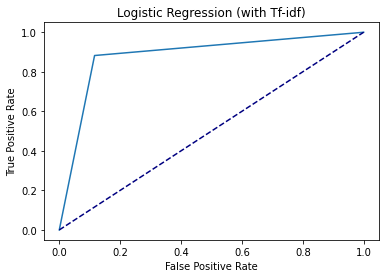

In [26]:
start = time.time()
model = LogisticRegression(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
end = time.time()
print("Time Taken (in seconds):" + str(end - start))
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Logistic Regression (with Tf-idf)', 'logistic_regression_tfidf')          

In [ ]:
model = PassiveAggressiveClassifier(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Passive Agressive (with Tf-idf)', 'passive_aggressive_tfidf') 

In [ ]:
model = Perceptron(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Perceptron (with Tf-idf)', 'perceptron_tfidf') 

In [ ]:
model = RidgeClassifier(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Ridge Classifier (with Tf-idf)', 'ridge_classifier_tfidf') 

Accuracy: 0.87496
F1 Score: 0.8819397235440743
Time Taken (in seconds):5.032516956329346


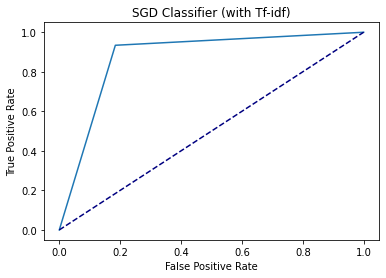

In [27]:
start = time.time()
model = SGDClassifier(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
end = time.time()
print("Time Taken (in seconds):" + str(end - start))
get_plot(test_sentiment, preds, 'SGD Classifier (with Tf-idf)', 'sgd_classifier_tfidf') 

# **Get Results from models (SVM)**

In [61]:
from sklearn.svm import LinearSVC, SVC, NuSVC

In [62]:
start = time.time()
model = LinearSVC(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
end = time.time()
print("Time Taken (in seconds):" + str(end - start))

Accuracy: 0.8726659925851028
F1 Score: 0.8735185805155674
Time Taken (in seconds):0.774174690246582


In [63]:
start = time.time()
model = SVC(random_state=4248, kernel='linear')
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
end = time.time()
print("Time Taken (in seconds):" + str(end - start))
get_metrics(test_sentiment, preds)

Time Taken (in seconds):620.0167369842529
Accuracy: 0.8775193798449612
F1 Score: 0.8784696675807638


In [ ]:
model = SVC(random_state=4248, kernel='poly')
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

In [ ]:
model = SVC(random_state=4248, kernel='rbf')
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

In [ ]:
model = SVC(random_state=4248, kernel='sigmoid')
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

In [ ]:
model = SVC(random_state=4248, kernel='precomputed')
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

In [ ]:
model = NuSVC(random_state=4248, kernel='linear')
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

In [ ]:
model = NuSVC(random_state=4248, kernel='poly')
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

In [ ]:
model = NuSVC(random_state=4248, kernel='rbf')
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

In [ ]:
model = NuSVC(random_state=4248, kernel='sigmoid')
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

In [ ]:
model = NuSVC(random_state=4248, kernel='precomputed')
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

# **Get Results from models (NN)**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Multi-layer Perceptron (with Tf-idf)', 'multi_layer_perceptron_tfidf')

In [ ]:
from sklearn.model_selection import train_test_split
train_google_features, val_google_features, train_sentiment, val_sentiment = train_test_split(
                                          train_google_features, train_sentiment, test_size=0.2, random_state=4248)

Referenced from https://github.com/cezannec/CNN_Text_Classification

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(train_google_features), torch.from_numpy(train_sentiment))
val_data = TensorDataset(torch.from_numpy(val_google_features), torch.from_numpy(val_sentiment))
test_data = TensorDataset(torch.from_numpy(test_google_features), torch.from_numpy(test_sentiment))

batch_size = 50
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentCNN(nn.Module):
    def __init__(self, embed_model, vocab_size, output_size, embedding_dim,
                 num_filters=100, kernel_sizes=[3, 4, 5], freeze_embeddings=True, drop_prob=0.5):
        super(SentimentCNN, self).__init__()
        self.num_filters = num_filters
        self.embedding_dim = embedding_dim
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.from_numpy(embed_model.vectors)) # all vectors
        
        if freeze_embeddings:
            self.embedding.requires_grad = False
        
        self.convs_1d = nn.ModuleList([
            nn.Conv2d(1, num_filters, (k, embedding_dim), padding=(k-2,0)) 
            for k in kernel_sizes])
        
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, output_size) 
        self.dropout = nn.Dropout(drop_prob)
        self.sig = nn.Sigmoid()
        
    
    def conv_and_pool(self, x, conv):
        x = F.relu(conv(x)).squeeze(3)
        x_max = F.max_pool1d(x, x.size(2)).squeeze(2)
        return x_max

    def forward(self, x):
        embeds = self.embedding(x) 
        embeds = embeds.unsqueeze(1)
        conv_results = [self.conv_and_pool(embeds, conv) for conv in self.convs_1d]
        x = torch.cat(conv_results, 1)
        x = self.dropout(x)
        logit = self.fc(x) 
        return self.sig(logit)

In [ ]:
vocab_size = len(pretrained_words)
output_size = 1 
embedding_dim = len(embed_lookup[pretrained_words[0]]) 
num_filters = 100
kernel_sizes = [3, 4, 5]

net = SentimentCNN(embed_lookup, vocab_size, output_size, embedding_dim,
                   num_filters, kernel_sizes)
net

In [ ]:
lr=0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [ ]:
def train(net, train_loader, epochs, print_every=100):
    counter = 0 
    net.train()

    for e in range(epochs):
        for inputs, labels in train_loader:
            counter += 1
            net.zero_grad()
            output = net(inputs)
            loss = criterion(output.squeeze(), labels.float())
            loss.backward()
            optimizer.step()

            if counter % print_every == 0:
                val_losses = []
                net.eval()

                for inputs, labels in val_loader:
                    output = net(inputs)
                    val_loss = criterion(output.squeeze(), labels.float())
                    val_losses.append(val_loss.item())

                net.train()
                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(val_losses)))

In [ ]:
epochs = 10
print_every = 100
train(net, train_loader, epochs, print_every=print_every)

In [ ]:
test_losses = [] 
num_correct = 0
net.eval()
for inputs, labels in test_loader:
    output = net(inputs)
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    pred = torch.round(output.squeeze()) 
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

print("Test loss: {:.3f}".format(np.mean(test_losses)))
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

# **Testing with self-generated reviews**

In [ ]:
model = LogisticRegression(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

In [ ]:
test_review_neg = "In the Name of the King: A Dungeon Siege Tale is yet another video game turned film by Uwe Boll. The cast is actually pretty good, and features Jason Statham, Ron Perlman, Leelee Sobieski, Claire Forlani, and Ray Liotta; but their performances are bland and lifeless. The only thing worst are the special effects, which are atrocious. And the score is mundane, capturing none of the adventure or wonder of a fantasy film. Cheaply made and uninspired, In the Name of the King: A Dungeon Siege Tale is a dreadful piece of garbage."
test_review_pos = "This movie lived up to its hype. It's possibly one of the best films of its kind, and I especially liked the development of all the characters. The villain isn't just a villain. I understood him. Like all Marvel films, the visual and aural elements are excellent. Acting and writing are top notch here as well. This film is a bit more serious than most Marvel films, which works in its favor."
test_review_neg = preprocess(test_review_neg)
test_review_pos = preprocess(test_review_pos)

In [ ]:
vectorizer = TfidfVectorizer(analyzer = "word", max_features = 10000) 
vectorizer.fit_transform(x_train).toarray()

In [ ]:
neg_tfidf = vectorizer.transform([test_review_neg])
pos_tfidf = vectorizer.transform([test_review_pos])

In [ ]:
model.predict(neg_tfidf)

In [ ]:
model.predict(pos_tfidf)

# **Ensembling Models Together**

In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

In [ ]:
model1 = SVC(random_state=4248, kernel='linear')
model2 = LogisticRegression(random_state=4248, max_iter=4248)
model3 = SGDClassifier(random_state=4248, max_iter=4248)

In [ ]:
model = StackingClassifier(estimators=[('svc', model1), ('lr', model2), ('sgd', model3)],
                          final_estimator=LogisticRegression(random_state=4248, max_iter=4248))
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Stacking (with Tf-idf)', 'stacking_tfidf')    

In [ ]:
model = VotingClassifier(estimators=[('svc', model1), ('lr', model2), ('sgd', model3)])
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Voting (with Tf-idf)', 'voting_tfidf')    